In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils
from keras.optimizers import SGD

In [3]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]
x_val=[]
y_val=[]

IMG_SIZE=128

path_train='/content/drive/MyDrive/eINT/train'
path_test='/content/drive/MyDrive/eINT/test'
path_val='/content/drive/MyDrive/eINT/val'

category={'Anger':0,'Disgust':1,'Fear':2,'Happiness':3,'Sadness':4,'Surprise':5}

for i in sorted(os.listdir(path_train)):

    path=os.path.join(path_train,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_train.append(img)
        y_train.append(category[i]) 
        
print('Number of Training images:',len(x_train))
print('Number of Labels for training images:',len(y_train))

for i in sorted(os.listdir(path_test)):

    path=os.path.join(path_test,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
        x_test.append(img)
        y_test.append(category[i]) 
        
print('Number of Testing images:',len(x_test))
print('Number of Labels for testing images:',len(y_test))

for i in sorted(os.listdir(path_val)):
    
    path=os.path.join(path_val,i)
    for j in os.listdir(path):
        img=cv2.imread(os.path.join(path,j),0) 
        img=cv2.resize(img,(IMG_SIZE,IMG_SIZE)) 
        x_val.append(img)
        y_val.append(category[i]) 
        
print('Number of Validation images:',len(x_val))

print('Number of Labels for validation images:',len(y_val))

Number of Training images: 11475
Number of Labels for training images: 11475
Number of Testing images: 1438
Number of Labels for testing images: 1438
Number of Validation images: 1433
Number of Labels for validation images: 1433


In [4]:
x_train= np.array(x_train, dtype="float") / 255.0
x_test=np.array(x_test,dtype="float") / 255.0
x_val= np.array(x_val, dtype="float") / 255.0

y_train= np.array(y_train) 
y_test=np.array(y_test)
y_val=np.array(y_val)

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
y_val=np_utils.to_categorical(y_val)

print(y_train)

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]


In [5]:
x_train_reshaped=x_train.reshape(x_train.shape[0],IMG_SIZE,IMG_SIZE,1)
x_test_reshaped=x_test.reshape(x_test.shape[0],IMG_SIZE,IMG_SIZE,1)
x_val_reshaped=x_val.reshape(x_val.shape[0],IMG_SIZE,IMG_SIZE,1)
print(x_train_reshaped.shape)
print(x_test_reshaped.shape)
print(x_val_reshaped.shape)

(11475, 128, 128, 1)
(1438, 128, 128, 1)
(1433, 128, 128, 1)


In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), input_shape=(IMG_SIZE,IMG_SIZE,1), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024, activation="relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(6,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 dropout (Dropout)           (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 64, 64, 64)        0         
                                                        

In [ ]:
epoch=50
learning_rate=0.01
decay_rate=learning_rate/epoch
momentum=0.8
sgd=SGD(lr=learning_rate,momentum=momentum,decay=decay_rate)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
model_history=model.fit(x_train_reshaped,
                        y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_data=(x_val_reshaped,y_val),
                        shuffle=True, 
                        callbacks=[callback])

Epoch 1/50
359/359 [==============================] - 35s 68ms/step - loss: 1.5729 - accuracy: 0.3383 - val_loss: 1.2996 - val_accuracy: 0.4606
Epoch 2/50
359/359 [==============================] - 22s 63ms/step - loss: 1.1170 - accuracy: 0.5555 - val_loss: 1.0841 - val_accuracy: 0.5946
Epoch 3/50
359/359 [==============================] - 23s 63ms/step - loss: 0.8154 - accuracy: 0.6844 - val_loss: 0.6928 - val_accuracy: 0.7425
Epoch 4/50
359/359 [==============================] - 23s 63ms/step - loss: 0.6056 - accuracy: 0.7744 - val_loss: 0.5234 - val_accuracy: 0.8234
Epoch 5/50
359/359 [==============================] - 23s 63ms/step - loss: 0.4675 - accuracy: 0.8270 - val_loss: 0.4683 - val_accuracy: 0.8360
Epoch 6/50
359/359 [==============================] - 23s 63ms/step - loss: 0.3694 - accuracy: 0.8647 - val_loss: 0.3604 - val_accuracy: 0.8758
Epoch 7/50
359/359 [==============================] - 23s 63ms/step - loss: 0.2942 - accuracy: 0.8953 - val_loss: 0.2822 - val_accuracy:

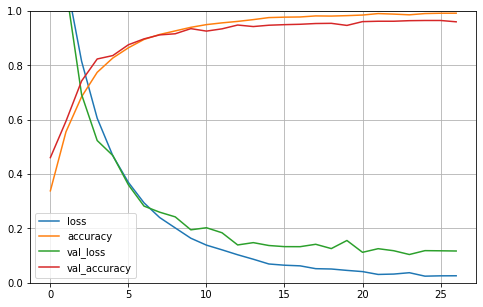

In [ ]:

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("emotionmodel.h5")

In [6]:
modelpath = '/content/drive/MyDrive/emotionmodel.h5'

In [8]:
model = tf.keras.models.load_model(modelpath, compile = True)

In [11]:
test_img = x_test[0]
test_label = y_test[0]

prediction = model.predict(np.array([test_img]))
predicted_label = np.argmax(prediction)

print('Actual label:', test_label)
print('Predicted label:', predicted_label)

1/1 [==============================] - 8s 8s/step
Actual label: [1. 0. 0. 0. 0. 0.]
Predicted label: 0


In [16]:
x_test = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

1/1 [==============================] - 0s 52ms/step


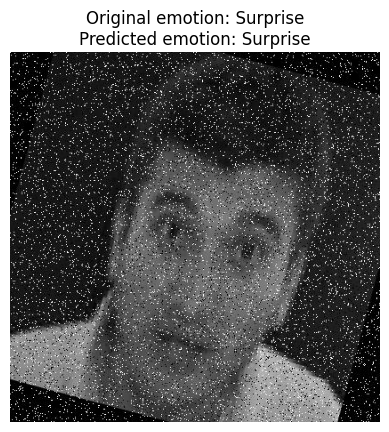

1/1 [==============================] - 0s 45ms/step


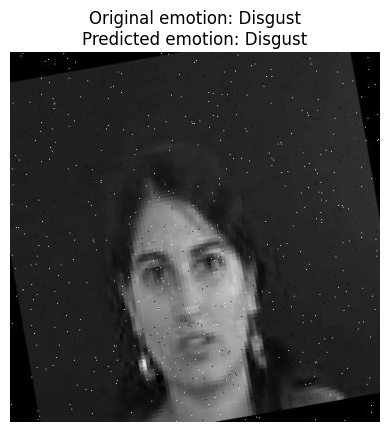

1/1 [==============================] - 0s 40ms/step


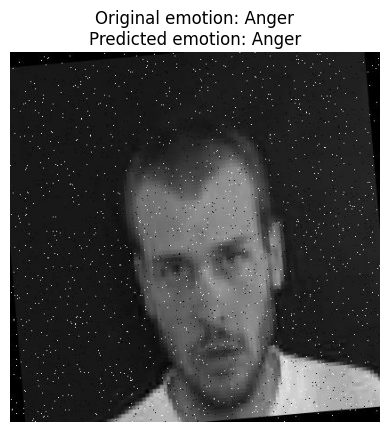

1/1 [==============================] - 0s 21ms/step


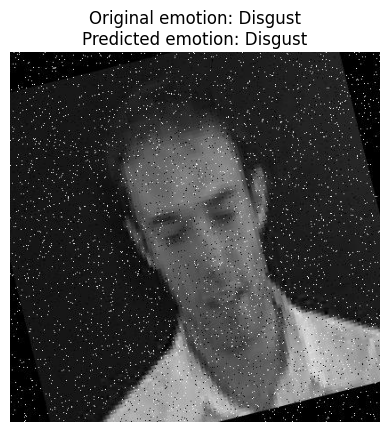

1/1 [==============================] - 0s 23ms/step


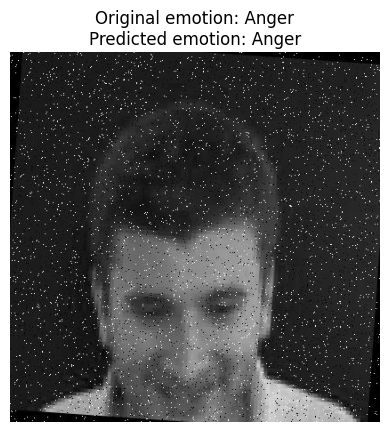

1/1 [==============================] - 0s 20ms/step


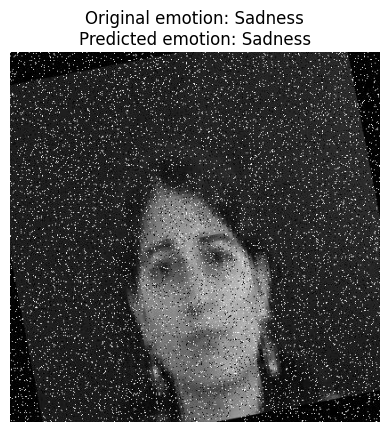

1/1 [==============================] - 0s 37ms/step


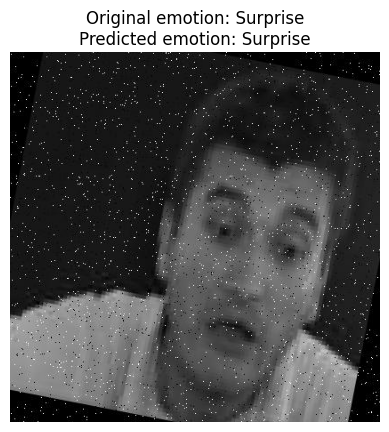

1/1 [==============================] - 0s 21ms/step


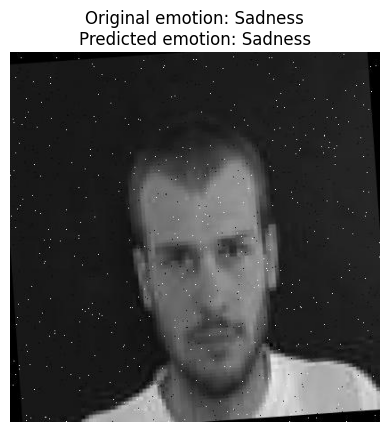

1/1 [==============================] - 0s 22ms/step


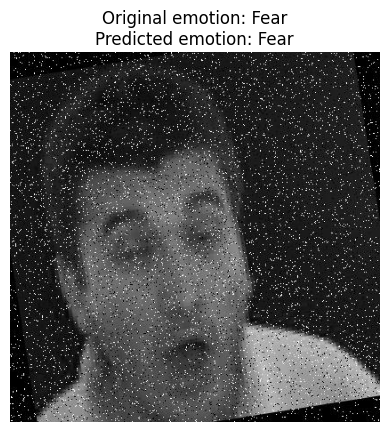

1/1 [==============================] - 0s 29ms/step


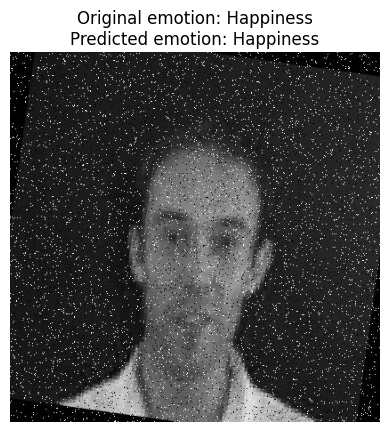

In [34]:
num_images = 10

for i in range(num_images):

    random_category = random.choice(os.listdir(path_test))
    path = os.path.join(path_test, random_category)
    random_image = random.choice(os.listdir(path))
    img_path = os.path.join(path, random_image)

    img = cv2.imread(img_path, 0)
    img = cv2.resize(img, (128, 128))
    img = np.array(img).reshape(-1, 128, 128, 1)
    img = img / 255.0

    prediction = model.predict(img)

    predicted_category = max(category, key=lambda key: prediction[0][category[key]])
    img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.title(f"Original emotion: {random_category}\nPredicted emotion: {predicted_category}")
    plt.axis('off')
    plt.show()